# Random Forest Model for Predicting Rating
This notebook demonstrates the use of a Random Forest model to predict the rating of Amazon sales data.

In [92]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# Load the Dataset
data = pd.read_csv('amazon.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [94]:
# Data Preprocessing
# Clean and preprocess the data
# Comprehensive cleaning of numeric columns to handle currency symbols, commas, and percentage signs
columns_to_clean = ['discounted_price', 'actual_price', 'rating_count']
for column in columns_to_clean:
    data[column] = data[column].astype(str).str.replace('₹', '').str.replace(',', '').str.strip().astype(float)
# Ensure percentage signs are removed from 'discount_percentage'
data['discount_percentage'] = data['discount_percentage'].astype(str).str.replace('%', '').str.strip().astype(float)
# Handle invalid or empty values in the 'rating' column
data['rating'] = data['rating'].replace(['', ' ', '|'], np.nan)
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['rating'] = data['rating'].fillna(data['rating'].mean())
# Calculate Profit Margin
data['Profit Margin'] = (data['actual_price'] - data['discounted_price']) / data['actual_price']
# Drop rows with missing or invalid values
data = data.dropna(subset=['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1463 non-null   object 
 1   product_name         1463 non-null   object 
 2   category             1463 non-null   object 
 3   discounted_price     1463 non-null   float64
 4   actual_price         1463 non-null   float64
 5   discount_percentage  1463 non-null   float64
 6   rating               1463 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1463 non-null   object 
 9   user_id              1463 non-null   object 
 10  user_name            1463 non-null   object 
 11  review_id            1463 non-null   object 
 12  review_title         1463 non-null   object 
 13  review_content       1463 non-null   object 
 14  img_link             1463 non-null   object 
 15  product_link         1463 non-null   object

In [95]:
# Feature Selection
# Change target variable to 'rating'
features = data[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']]
target = data['rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [96]:
# Train the Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0748062995150042
R-squared: -0.003607774867102176


C:\Users\Touseef Haider\AppData\Local\Temp\ipykernel_14292\2388703887.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


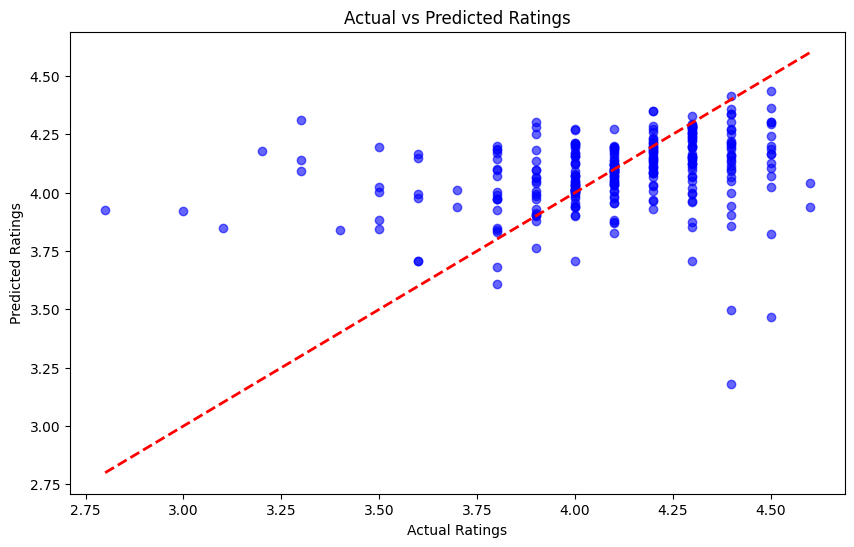

In [98]:
# Plot the graph to compare actual vs predicted ratings
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()